In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train, y_train), (x_test, y_test) = reuters.load_data()

In [8]:
# 단어 사전
word_index = reuters.get_word_index()


In [9]:
idx2word ={0: "<PAD>", 1:"<s>", 2: "<JNK>"}

In [10]:
idx2word.update({value +3 : key for key, value in word_index.items()})

In [11]:
" ".join(map(lambda x: idx2word[x], x_train[0]))

'<s> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
# 전체 단어수 
len(word_index.keys())

30979

In [19]:
# hyperprameter
VOCAB_SIZE = 800
MAX_LEN = 100
CLASSES = len(np.unique(y_train))

In [20]:
CLASSES

46

In [21]:
# 단어 수 설정 후 다시 data load
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = VOCAB_SIZE )

In [22]:
word_index = reuters.get_word_index()
idx2word = {0: "<PAD>", 1:"<s>", 2: "<JNK>"}
idx2word.update({value +3 : key for key, value in word_index.items()})

for i in range(5):
    print(f"{i}번째 data")
    print(" ". join(map(lambda x: idx2word[x], x_train[i])), end = "\n\n")

0번째 data
<s> <JNK> <JNK> said as a result of its december acquisition of <JNK> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said <JNK> net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <JNK> <JNK> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <JNK> per share this year should be 2 50 to three dlrs reuter 3

1번째 data
<s> <JNK> de <JNK> <JNK> lt <JNK> <JNK> and lt <JNK> <JNK> corp of <JNK> have each taken 50 pct <JNK> in <JNK> company <JNK> <JNK> <JNK> <JNK> de <JNK> said in a statement it <JNK> no financial details of the transaction <JNK> <JNK> <JNK> turnover in 1986 was 17 5 billion <JNK> francs reuter 3

2번째 data
<s> shr 3 28 dlrs vs 22 cts shr <JNK> 2 <JNK> dlrs vs 22 cts net 46 0 mln vs 3 <JNK> 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr <JNK> 4 <JNK> dlrs vs 1 50 dlrs net <JNK> 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share <JNK> the tw

In [25]:
# 데이터 길이 분석
lengths = np.array([len(x) for x in x_train])

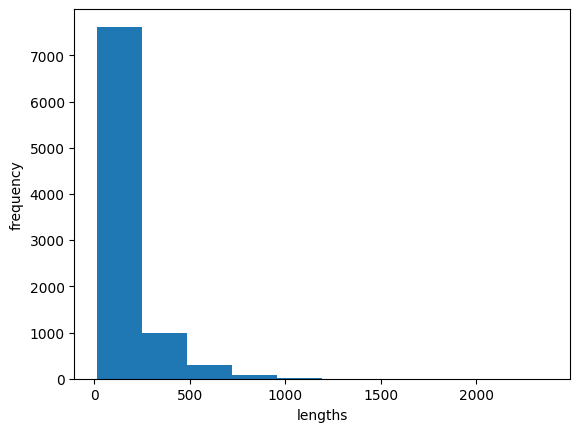

In [26]:
plt.figure()

plt.hist(lengths)

plt.xlabel("lengths")
plt.ylabel("frequency")
plt.show()

In [28]:
np.mean(length)

145.5398574927633

In [31]:
np.quantile(length, [0.25,0.5, 0.75])

array([ 60.,  95., 179.])

In [32]:
np.max(length)

2376

In [33]:
# 종속변수 종류 수 확인
len(np.unique(y_train))

46

In [35]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                             stratify = y_train, random_state = 5)

In [36]:
# 데이터 길이 전처리
sub_seq = pad_sequences(x_sub, maxlen = MAX_LEN, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = MAX_LEN, truncating = "post")
test_seq = pad_sequences(x_val, maxlen = MAX_LEN, truncating = "post")


In [37]:
sub_seq .shape

(7185, 100)

In [41]:
model = keras.Sequential()
model.add(keras.layers.Embedding(VOCAB_SIZE, 128, input_length = MAX_LEN))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64,5, activation ="relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(CLASSES, activation = "softmax"))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          102400    
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 46)                2990      
                                                      

In [54]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [55]:
histoty = model.fit(sub_seq, y_sub, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                    callbacks = [early_stopping_cb])


Epoch 1/100
113/113 [==============================] - 8s 56ms/step - loss: 3.3772 - accuracy: 0.3344 - val_loss: 2.7959 - val_accuracy: 0.3517
Epoch 2/100
113/113 [==============================] - 6s 50ms/step - loss: 2.5565 - accuracy: 0.3521 - val_loss: 2.3611 - val_accuracy: 0.4190
Epoch 3/100
113/113 [==============================] - 5s 48ms/step - loss: 2.2459 - accuracy: 0.4322 - val_loss: 2.1562 - val_accuracy: 0.4713
Epoch 4/100
113/113 [==============================] - 5s 48ms/step - loss: 2.0809 - accuracy: 0.4793 - val_loss: 2.0185 - val_accuracy: 0.5042
Epoch 5/100
113/113 [==============================] - 5s 48ms/step - loss: 1.9672 - accuracy: 0.5041 - val_loss: 1.9442 - val_accuracy: 0.5164
Epoch 6/100
113/113 [==============================] - 6s 49ms/step - loss: 1.8873 - accuracy: 0.5141 - val_loss: 1.9764 - val_accuracy: 0.4903
Epoch 7/100
113/113 [==============================] - 5s 48ms/step - loss: 1.8203 - accuracy: 0.5386 - val_loss: 1.8608 - val_accuracy:

113/113 [==============================] - 6s 49ms/step - loss: 1.0007 - accuracy: 0.7598 - val_loss: 1.1255 - val_accuracy: 0.7368
Epoch 58/100
113/113 [==============================] - 5s 48ms/step - loss: 0.9898 - accuracy: 0.7620 - val_loss: 1.1160 - val_accuracy: 0.7407
Epoch 59/100
113/113 [==============================] - 5s 47ms/step - loss: 0.9806 - accuracy: 0.7678 - val_loss: 1.1408 - val_accuracy: 0.7334
Epoch 60/100
113/113 [==============================] - 5s 46ms/step - loss: 0.9798 - accuracy: 0.7645 - val_loss: 1.1068 - val_accuracy: 0.7368
Epoch 61/100
113/113 [==============================] - 5s 48ms/step - loss: 0.9642 - accuracy: 0.7712 - val_loss: 1.1507 - val_accuracy: 0.7351
Epoch 62/100
113/113 [==============================] - 5s 49ms/step - loss: 0.9580 - accuracy: 0.7715 - val_loss: 1.1136 - val_accuracy: 0.7440
Epoch 63/100
113/113 [==============================] - 5s 48ms/step - loss: 0.9517 - accuracy: 0.7748 - val_loss: 1.1120 - val_accuracy: 0.745

In [62]:
model.evaluate(test_seq, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 1797
  y sizes: 2246
Make sure all arrays contain the same number of samples.

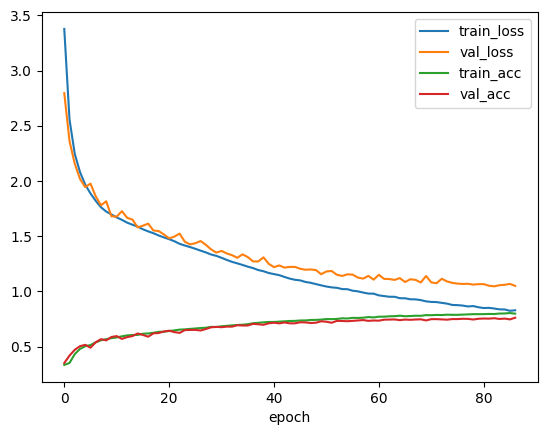

In [61]:
plt.figure()

plt.plot(histoty.history["loss"], label = "train_loss")
plt.plot(histoty.history["val_loss"], label = "val_loss")
plt.plot(histoty.history["accuracy"], label = "train_acc")
plt.plot(histoty.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()